In [23]:
import tensorflow as tf
import numpy as np
import math
import timeit
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=10000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = '/Users/subirvarma/handson-ml/cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [25]:
tf.reset_default_graph()

height = 32
width = 32
channels = 3
n_inputs = height * width

conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 1
conv2_pad = "SAME"

pool2_fmaps = conv2_fmaps

n_fc1 = 64
n_outputs = 10

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, height, width, channels], name="X")
    y = tf.placeholder(tf.int64, shape=[None], name="y")
    is_training = tf.placeholder(tf.bool)

conv1 = tf.layers.conv2d(X, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")

pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

conv2 = tf.layers.conv2d(pool1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)
pool2_flat = tf.reshape(pool2, shape=[-1, pool2_fmaps * 8 * 8])

with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool2_flat, n_fc1, activation=tf.nn.relu, name="fc1")

with tf.name_scope("output"):
    y_out = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(y_out, name="Y_proba")
    
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=y_out, labels=y)
mean_loss = tf.reduce_mean(xentropy)

# define our optimizer
optimizer = tf.train.AdamOptimizer(5e-4) # select optimizer and set learning rate
train_step = optimizer.minimize(mean_loss)


Training
Iteration 0: with minibatch training loss = 50.4 and accuracy of 0.094
Iteration 100: with minibatch training loss = 2.13 and accuracy of 0.25
Iteration 200: with minibatch training loss = 1.85 and accuracy of 0.31
Iteration 300: with minibatch training loss = 1.71 and accuracy of 0.48
Iteration 400: with minibatch training loss = 1.83 and accuracy of 0.38
Iteration 500: with minibatch training loss = 1.54 and accuracy of 0.41
Iteration 600: with minibatch training loss = 1.56 and accuracy of 0.34
Iteration 700: with minibatch training loss = 1.28 and accuracy of 0.5
Epoch 1, Overall loss = 2.2 and accuracy of 0.35


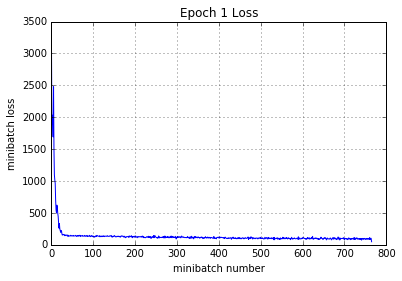

Iteration 800: with minibatch training loss = 1.51 and accuracy of 0.52
Iteration 900: with minibatch training loss = 1.17 and accuracy of 0.59
Iteration 1000: with minibatch training loss = 1.42 and accuracy of 0.48
Iteration 1100: with minibatch training loss = 1.18 and accuracy of 0.62
Iteration 1200: with minibatch training loss = 1.52 and accuracy of 0.42
Iteration 1300: with minibatch training loss = 1.05 and accuracy of 0.59
Iteration 1400: with minibatch training loss = 1.31 and accuracy of 0.45
Iteration 1500: with minibatch training loss = 1.22 and accuracy of 0.64
Epoch 2, Overall loss = 1.3 and accuracy of 0.536


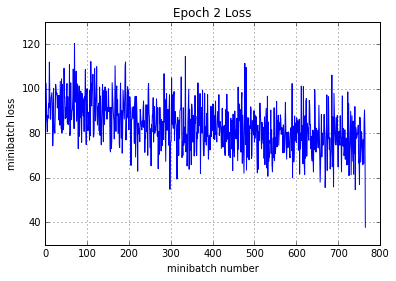

Iteration 1600: with minibatch training loss = 1.1 and accuracy of 0.59
Iteration 1700: with minibatch training loss = 1.21 and accuracy of 0.61
Iteration 1800: with minibatch training loss = 1.09 and accuracy of 0.7
Iteration 1900: with minibatch training loss = 1.19 and accuracy of 0.64
Iteration 2000: with minibatch training loss = 1.06 and accuracy of 0.53
Iteration 2100: with minibatch training loss = 0.963 and accuracy of 0.69
Iteration 2200: with minibatch training loss = 1.08 and accuracy of 0.59
Epoch 3, Overall loss = 1.1 and accuracy of 0.611


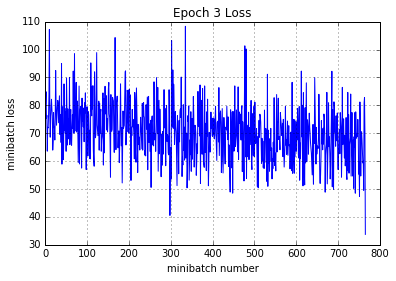

Iteration 2300: with minibatch training loss = 1.09 and accuracy of 0.66
Iteration 2400: with minibatch training loss = 0.942 and accuracy of 0.72
Iteration 2500: with minibatch training loss = 1.13 and accuracy of 0.77
Iteration 2600: with minibatch training loss = 1.4 and accuracy of 0.5
Iteration 2700: with minibatch training loss = 1 and accuracy of 0.69
Iteration 2800: with minibatch training loss = 0.915 and accuracy of 0.61
Iteration 2900: with minibatch training loss = 0.951 and accuracy of 0.61
Iteration 3000: with minibatch training loss = 1.01 and accuracy of 0.67
Epoch 4, Overall loss = 0.975 and accuracy of 0.66


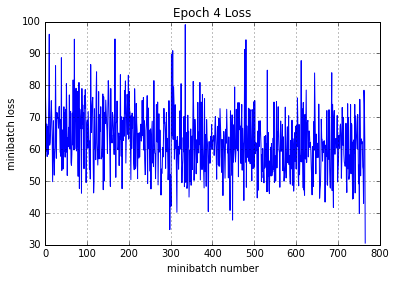

Iteration 3100: with minibatch training loss = 0.827 and accuracy of 0.75
Iteration 3200: with minibatch training loss = 0.805 and accuracy of 0.69
Iteration 3300: with minibatch training loss = 0.881 and accuracy of 0.77
Iteration 3400: with minibatch training loss = 0.69 and accuracy of 0.8
Iteration 3500: with minibatch training loss = 0.828 and accuracy of 0.72
Iteration 3600: with minibatch training loss = 0.688 and accuracy of 0.78
Iteration 3700: with minibatch training loss = 0.731 and accuracy of 0.69
Iteration 3800: with minibatch training loss = 0.88 and accuracy of 0.72
Epoch 5, Overall loss = 0.88 and accuracy of 0.693


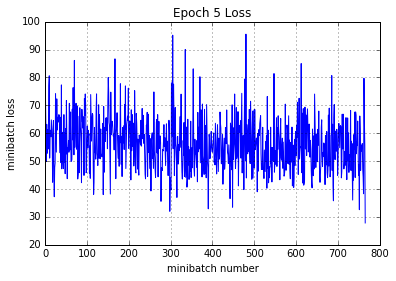

Iteration 3900: with minibatch training loss = 1.22 and accuracy of 0.55
Iteration 4000: with minibatch training loss = 0.814 and accuracy of 0.72
Iteration 4100: with minibatch training loss = 0.664 and accuracy of 0.69
Iteration 4200: with minibatch training loss = 1.17 and accuracy of 0.59
Iteration 4300: with minibatch training loss = 1.13 and accuracy of 0.61
Iteration 4400: with minibatch training loss = 0.688 and accuracy of 0.72
Iteration 4500: with minibatch training loss = 0.772 and accuracy of 0.75
Epoch 6, Overall loss = 0.8 and accuracy of 0.723


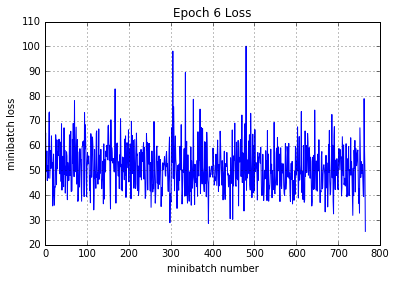

Iteration 4600: with minibatch training loss = 0.874 and accuracy of 0.67
Iteration 4700: with minibatch training loss = 0.781 and accuracy of 0.69
Iteration 4800: with minibatch training loss = 0.846 and accuracy of 0.67
Iteration 4900: with minibatch training loss = 0.689 and accuracy of 0.75
Iteration 5000: with minibatch training loss = 0.645 and accuracy of 0.73
Iteration 5100: with minibatch training loss = 0.784 and accuracy of 0.67
Iteration 5200: with minibatch training loss = 0.722 and accuracy of 0.72
Iteration 5300: with minibatch training loss = 0.722 and accuracy of 0.78
Epoch 7, Overall loss = 0.729 and accuracy of 0.749


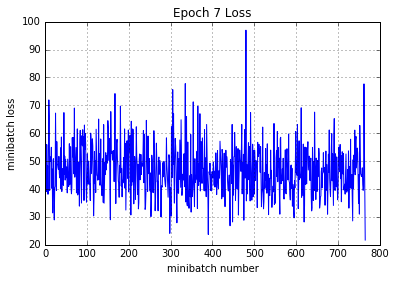

Iteration 5400: with minibatch training loss = 0.574 and accuracy of 0.78
Iteration 5500: with minibatch training loss = 0.756 and accuracy of 0.8
Iteration 5600: with minibatch training loss = 0.7 and accuracy of 0.78
Iteration 5700: with minibatch training loss = 0.875 and accuracy of 0.73
Iteration 5800: with minibatch training loss = 0.584 and accuracy of 0.8
Iteration 5900: with minibatch training loss = 0.628 and accuracy of 0.8
Iteration 6000: with minibatch training loss = 0.485 and accuracy of 0.83
Iteration 6100: with minibatch training loss = 0.71 and accuracy of 0.72
Epoch 8, Overall loss = 0.672 and accuracy of 0.768


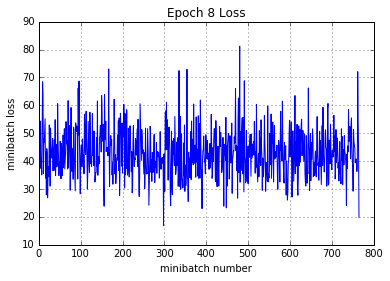

Iteration 6200: with minibatch training loss = 0.591 and accuracy of 0.8
Iteration 6300: with minibatch training loss = 0.767 and accuracy of 0.72
Iteration 6400: with minibatch training loss = 0.669 and accuracy of 0.77
Iteration 6500: with minibatch training loss = 0.724 and accuracy of 0.72
Iteration 6600: with minibatch training loss = 0.634 and accuracy of 0.8
Iteration 6700: with minibatch training loss = 0.64 and accuracy of 0.75
Iteration 6800: with minibatch training loss = 0.512 and accuracy of 0.8
Epoch 9, Overall loss = 0.625 and accuracy of 0.782


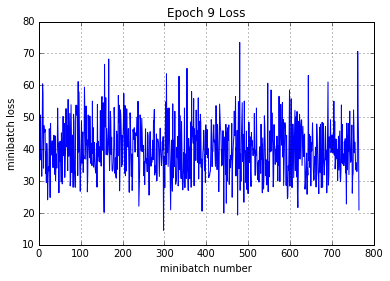

Iteration 6900: with minibatch training loss = 0.543 and accuracy of 0.8
Iteration 7000: with minibatch training loss = 0.447 and accuracy of 0.81
Iteration 7100: with minibatch training loss = 0.716 and accuracy of 0.72
Iteration 7200: with minibatch training loss = 0.63 and accuracy of 0.81
Iteration 7300: with minibatch training loss = 0.461 and accuracy of 0.78
Iteration 7400: with minibatch training loss = 0.502 and accuracy of 0.88
Iteration 7500: with minibatch training loss = 0.563 and accuracy of 0.86
Iteration 7600: with minibatch training loss = 0.438 and accuracy of 0.83
Epoch 10, Overall loss = 0.578 and accuracy of 0.797


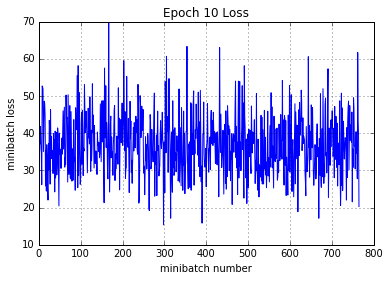

Validation
Epoch 1, Overall loss = 1.33 and accuracy of 0.61


In [26]:
def run_model(session, predict, loss_val, Xd, yd,
              epochs=10, batch_size=64, print_every=100,
              training=None, plot_losses=False):
    # have tensorflow compute accuracy
    correct_prediction = tf.equal(tf.argmax(predict,1), y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    # shuffle indicies
    train_indicies = np.arange(Xd.shape[0])
    np.random.shuffle(train_indicies)

    training_now = training is not None
    
    # setting up variables we want to compute (and optimizing)
    # if we have a training function, add that to things we compute
    variables = [mean_loss,correct_prediction,accuracy]
    if training_now:
        variables[-1] = training
    
    # counter 
    iter_cnt = 0
    for e in range(epochs):
        # keep track of losses and accuracy
        correct = 0
        losses = []
        # make sure we iterate over the dataset once
        for i in range(int(math.ceil(Xd.shape[0]/batch_size))):
            # generate indicies for the batch
            start_idx = (i*batch_size)%Xd.shape[0]
            idx = train_indicies[start_idx:start_idx+batch_size]
            
            # create a feed dictionary for this batch
            feed_dict = {X: Xd[idx,:],
                         y: yd[idx],
                         is_training: training_now }
            # get batch size
            actual_batch_size = yd[idx].shape[0]
            
            # have tensorflow compute loss and correct predictions
            # and (if given) perform a training step
            loss, corr, _ = session.run(variables,feed_dict=feed_dict)
            
            # aggregate performance stats
            losses.append(loss*actual_batch_size)
            correct += np.sum(corr)
            
            # print every now and then
            if training_now and (iter_cnt % print_every) == 0:
                print("Iteration {0}: with minibatch training loss = {1:.3g} and accuracy of {2:.2g}"\
                      .format(iter_cnt,loss,np.sum(corr)/actual_batch_size))
            iter_cnt += 1
        total_correct = correct/Xd.shape[0]
        total_loss = np.sum(losses)/Xd.shape[0]
        print("Epoch {2}, Overall loss = {0:.3g} and accuracy of {1:.3g}"\
              .format(total_loss,total_correct,e+1))
        if plot_losses:
            plt.plot(losses)
            plt.grid(True)
            plt.title('Epoch {} Loss'.format(e+1))
            plt.xlabel('minibatch number')
            plt.ylabel('minibatch loss')
            plt.show()
    return total_loss,total_correct

with tf.Session() as sess:
    with tf.device("/cpu:0"): #"/cpu:0" or "/gpu:0" 
        sess.run(tf.global_variables_initializer())
        print('Training')
        run_model(sess,y_out,mean_loss,X_train,y_train,10,64,100,train_step,True)
        print('Validation')
        run_model(sess,y_out,mean_loss,X_val,y_val,1,64)